In [1]:
# PART ONE
# Data preparation
# The first assignment is to read data from a data file. The data is often given
# in a .csv file (Comma Separated Values). For this exercise we have a data set
# given from SMHI.

In [2]:
# In the beginning of the project we use to define all libraries that we want
# to use in this project.

# pandas - makes it possible to read datafiles and put the into dataframes
# which is really useful when we work with big sets of data.
import pandas as pd

/var/folders/2s/993lm8016ydb51k29wxrdyqh0000gn/T/ipykernel_74326/3444306485.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# Read in the training set
# As you can see - we have two different datasets for this assignment.

# One dataset is given to train our neural network and one is given to test
# the neural network. We start to look at the training set.

training_data = pd.read_csv('01_smhi_training_data.csv', sep=";")

In [4]:
# When we run this cell we see nothing. To see the variable we created just
# simply write the variable you want to be visible (in this specific case we
# want to see the variable "training_data")

training_data

,Datum,Tid (UTC),Lufttemperatur,Kvalitet,Unnamed: 4,Tidsutsnitt:
0,1993-04-29,02:00:00,1.3,Y,NaN,NaN
1,1993-04-29,04:00:00,1.2,Y,NaN,NaN
2,1993-04-29,05:00:00,5.8,Y,NaN,NaN
3,1993-04-29,06:00:00,6.4,G,NaN,NaN
4,1993-04-29,07:00:00,8.2,Y,NaN,NaN
...,...,...,...,...,...,...
265014,2023-11-28,19:00:00,-7.2,G,NaN,NaN
265015,2023-11-28,20:00:00,-7.4,G,NaN,NaN
265016,2023-11-28,21:00:00,-7.3,G,NaN,NaN
265017,2023-11-28,22:00:00,-7.1,G,NaN,NaN


In [5]:
# As you can see - we have air temperatures given from 1993 to 2021 
# measured at each hour. This gives us 243 922 values to handle. A good way
# to get an overview of our dataset is to use .info() and .head()

training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265019 entries, 0 to 265018
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Datum           265019 non-null  object 
 1   Tid (UTC)       265019 non-null  object 
 2   Lufttemperatur  265019 non-null  float64
 3   Kvalitet        265019 non-null  object 
 4   Unnamed: 4      0 non-null       float64
 5   Tidsutsnitt:    0 non-null       float64
dtypes: float64(3), object(3)
memory usage: 12.1+ MB


In [6]:
# The info panel is good to explore to see if we have any null values. In that
# case we need to clean this data. For this assignment we are only interested
# in the columns "Datum". "Tid (UTC)" and "Lufttemperatur".
# Since these columns are clean from null values we don't make a further 
# analysis. 

# In this given example we work with a nice and clear dataset. This assignment 
# is more focused on preparation of data and how to make readable for a neural 
# network. We can dive deeper into the cleaning process of data in another 
# assignment.

# Let's take a look at the .head() method
training_data.head()

,Datum,Tid (UTC),Lufttemperatur,Kvalitet,Unnamed: 4,Tidsutsnitt:
0,1993-04-29,02:00:00,1.3,Y,NaN,NaN
1,1993-04-29,04:00:00,1.2,Y,NaN,NaN
2,1993-04-29,05:00:00,5.8,Y,NaN,NaN
3,1993-04-29,06:00:00,6.4,G,NaN,NaN
4,1993-04-29,07:00:00,8.2,Y,NaN,NaN


In [7]:
# This gives us the five first rows in the dataset. I like to always use this
# to make sure that my data is read correctly and to see what variables my
# dataset contains.

# Tips and tricks
# You can ask the method to reveal a certain number of rows, e.g. 20 rows:
training_data.head(20)

,Datum,Tid (UTC),Lufttemperatur,Kvalitet,Unnamed: 4,Tidsutsnitt:
0,1993-04-29,02:00:00,1.3,Y,NaN,NaN
1,1993-04-29,04:00:00,1.2,Y,NaN,NaN
2,1993-04-29,05:00:00,5.8,Y,NaN,NaN
3,1993-04-29,06:00:00,6.4,G,NaN,NaN
4,1993-04-29,07:00:00,8.2,Y,NaN,NaN
5,1993-04-29,08:00:00,10.4,Y,NaN,NaN
6,1993-04-29,10:00:00,13.4,Y,NaN,NaN
7,1993-04-29,11:00:00,13.8,Y,NaN,NaN
8,1993-04-29,12:00:00,14.8,G,NaN,NaN
9,1993-04-29,13:00:00,15.5,Y,NaN,NaN


In [8]:
# The next step to consider is what data in this dataset is of interest.
# The columns "Kvalitet", "Unnamed: 4" and "Tidsutsnitt" is not of interest.
# For this assignment we only need the columns "Datum". "Tid (UTC)" and 
# "Lufttemperatur". For the neural network is only interested of the
# temperature data so we start to create an array with only this data.

# The next step is therefore to select data of interest 
# --> save this data in a numpy array
# NOTE: We use .values to convert the data to an numpy array
training_set_temp = training_data.iloc[:, 2:3].values
training_set_temp

array([[ 1.3],
       [ 1.2],
       [ 5.8],
       ...,
       [-7.3],
       [-7.1],
       [-6.4]])

In [9]:
# The next preparation step is to scale our data. I recommend you to read this
# article to better understand why we need to scale our data:
# https://analyticsindiamag.com/why-data-scaling-is-important-in-machine-learning-how-to-effectively-do-it/

# When scaling the training_set_temp we normally use standardization or normalization.
# The neural network that we are creating will have a continuous output since
# the network will make predictions of the air temperature.
# Since our output signal is continuous --> NORMALIZATION is recommended

# Import library with predefined scalers
from sklearn.preprocessing import MinMaxScaler

# Create a scalar with value (range) between 0 and 1
scaler = MinMaxScaler(feature_range = (0,1))

# Apply scaler on training set
training_set_temp_scaled = scaler.fit_transform(training_set_temp)
training_set_temp_scaled

array([[0.44243421],
       [0.44078947],
       [0.51644737],
       ...,
       [0.30098684],
       [0.30427632],
       [0.31578947]])

In [10]:
# In this example we will create a neural network 
# called RNN (Recurrent Neural Network). You can read more about this kind 
# of network here:
# https://builtin.com/data-science/recurrent-neural-networks-and-lstm

# The RNN has have the concept of ‘memory’ that helps them store the states 
# or information of previous inputs to generate the next output of the 
# sequence. We now need to modify our array into a data structure that could be 
# understood by a RNN.

# Create a data structure with 48 timesteps (X_train) and 1 output (y_train)
# timesteps --> 48 previous hours are used to predict the next output
# X_train --> 48 previous temperature measures
# y_train --> value at the current hour
# NOTE: [] --> is a type list and NOT a np array
X_train = []
y_train = [] 

timestep = 48
observations = len(training_set_temp_scaled) # 243922 rows

for i in range(timestep, observations):
        X_train.append(training_set_temp_scaled[i-timestep:i,0])
        y_train.append(training_set_temp_scaled[i,0])

In [11]:
# Take a look att X_train and try to understand what we did in the previous step
X_train

[array([0.44243421, 0.44078947, 0.51644737, 0.52631579, 0.55592105,
        0.59210526, 0.64144737, 0.64802632, 0.66447368, 0.67598684,
        0.67105263, 0.65131579, 0.63157895, 0.61019737, 0.58059211,
        0.55756579, 0.50328947, 0.47532895, 0.45559211, 0.54934211,
        0.59046053, 0.61842105, 0.67927632, 0.70888158, 0.72203947,
        0.72697368, 0.72532895, 0.69407895, 0.66776316, 0.62993421,
        0.59539474, 0.56907895, 0.52960526, 0.50328947, 0.46217105,
        0.45065789, 0.44901316, 0.51151316, 0.56907895, 0.61513158,
        0.66282895, 0.70394737, 0.71217105, 0.71217105, 0.71381579,
        0.70559211, 0.69243421, 0.65296053]),
 array([0.44078947, 0.51644737, 0.52631579, 0.55592105, 0.59210526,
        0.64144737, 0.64802632, 0.66447368, 0.67598684, 0.67105263,
        0.65131579, 0.63157895, 0.61019737, 0.58059211, 0.55756579,
        0.50328947, 0.47532895, 0.45559211, 0.54934211, 0.59046053,
        0.61842105, 0.67927632, 0.70888158, 0.72203947, 0.72697368,
  

In [12]:
# Take a look att y_train and try to understand what we did in the previous step
y_train[0:20]

[0.6282894736842105,
 0.600328947368421,
 0.5641447368421052,
 0.5263157894736842,
 0.5213815789473684,
 0.5213815789473684,
 0.5230263157894737,
 0.5427631578947368,
 0.5608552631578947,
 0.59375,
 0.6151315789473684,
 0.6677631578947368,
 0.7582236842105263,
 0.7664473684210527,
 0.7730263157894737,
 0.7648026315789473,
 0.7532894736842104,
 0.7203947368421052,
 0.7105263157894737,
 0.6776315789473684]

In [13]:
# X_train and y_train are now in list format and can not be understood by a neural network.
# We now need to convert these list into np.arrays which is the format
# that the RNN can understand and read.

# Import library numpy to convert the lists to np.arrays
import numpy as np

# Convert the lists X_train and y_train to np.arrays
X_train, y_train = np.array(X_train), np.array(y_train)

In [14]:
X_train.shape

(264971, 48)

In [15]:
y_train.shape

(264971,)

In [16]:
# The last step we need to do is to reshape our X_train array to fulfill 
# requirement of inputs for the RNN 

# We currently have an 2D matrix - X_train --> (264971, 48) matrix
# We want a 3D matrix - the third dimension corresponds to the indicator
# In this case the indicator is 1 since we have one output
# array.shape[0] --> number of rows
# array.shape[1] --> number of columns
# reshape(arrayLike, newShape, order)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [17]:
# Well done! 
# You have now prepared the dataset to be able to function as 
# input for a neural network. The next step is to build our RNN.

In [18]:
# PART TWO
# Prepare the neural network (RNN)
# For this part i will give you a basic RNN to work with
# Keras documentation is really good to look at to learn more about the specific
# classes and methods used in the Regressor function defined below.

# Keras documentation: https://keras.io/api/

# lstm - long-short term memory
# units - number of neurons in the layer

# To read more generally about neural networks look here:
# https://wiki.pathmind.com/neural-network

# Building  the RNN (Recurrent Neural Network)
# Import Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.saving import load_model

def Regressor(X_train):
    
    # Initializing the RNN 
    model = Sequential()
    
    # Add the first layer to the neural network
    model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
    
    # Dropout regulation (use to be set to 20%)
    # --> this is the number of neurons to be ignored
    model.add(Dropout(0.2))
    
    # Add more layers to the neural network
    # Second layer
    model.add(LSTM(units = 50, return_sequences = True))
    model.add(Dropout(0.2))
    
    # Third layer
    model.add(LSTM(units = 50, return_sequences = True))
    model.add(Dropout(0.2))
    
    # Forth layer - last layer before output  layer
    model.add(LSTM(units = 50))
    model.add(Dropout(0.2))
    
    # Output layer
    model.add(Dense(units = 1))
    
    # Compiling the RNN
    # NOTE: Optimizer - RMSprops is recommended for RNN but Adam was detected to 
    # be a better choice for this problem
    model.compile(optimizer = 'adam', loss = 'mean_squared_error')
    
    return model

In [19]:
# We now have a basic RNN called Regressor. The next step is to give this 
# neural network our prepared dataset (X_train) to train on.

# Create a RNN model instance
regressor = Regressor(X_train)

# Training - fit the RNN to the training set
# epochs - the amount of "training sets" the network should do (you can experiment with 
# this value and evaluate the results)
# batch_size - number of data rows that will be sent into the network momentarily
# for training

# This step will take a while depending on the amount of epochs 
# you chose, size of your dataset and the capacity of you computer. 
# We start with 5 epochs just to demonstrate how the training works. You can
# increase this value later to get a better result.
regressor.fit(
    X_train, 
    y_train, 
    epochs = 2, 
    batch_size = 32)

Epoch 1/2
8281/8281 [==============================] - 192s 23ms/step - loss: 0.0018
Epoch 2/2
8281/8281 [==============================] - 199s 24ms/step - loss: 3.9525e-04


In [38]:
# Well done! When the Epoch is set to 2/2 your network is done training! :)

In [39]:
# If you want to save you network you can use the given function below
# regressor.save('regressor_model_technet.keras')

In [40]:
# To save some time this lab comes with and pre-trained network which will be loaded in this step below
loaded_model = load_model('regressor_model_technet.keras')

In [41]:
# First of all we need our test data set to compare with the result we got from our
test_data = pd.read_csv('02_smhi_test_data.csv', sep=";")

In [42]:
# We use the .info and .describe methods to make sure that our test data
# was read correctly
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Datum           48 non-null     object 
 1   Tid (UTC)       48 non-null     object 
 2   Lufttemperatur  48 non-null     float64
 3   Kvalitet        48 non-null     object 
 4   Unnamed: 4      0 non-null      float64
 5   Tidsutsnitt:    0 non-null      float64
dtypes: float64(3), object(3)
memory usage: 2.4+ KB


In [43]:
test_data.describe()

,Lufttemperatur,Unnamed: 4,Tidsutsnitt:
count,48.0000,0.0,0.0
mean,-5.1625,NaN,NaN
std,2.9145,NaN,NaN
min,-10.4000,NaN,NaN
25%,-7.1250,NaN,NaN
50%,-5.4000,NaN,NaN
75%,-2.2000,NaN,NaN
max,-1.6000,NaN,NaN


In [44]:
# Our test data looks good!

# We now make the same procedure as we did with the training set - we 
# choose the data needed for this calculation (air temperature)
real_temperature = test_data.iloc[:, 2:3].values
real_temperature

array([[ -6.4],
       [ -6.6],
       [ -6.6],
       [ -6.4],
       [ -6.6],
       [ -7. ],
       [ -8.6],
       [ -9.9],
       [-10. ],
       [ -7.6],
       [ -7.2],
       [ -6.8],
       [ -6.2],
       [ -5.7],
       [ -7.4],
       [ -9.2],
       [ -9.6],
       [ -9.9],
       [-10.4],
       [ -9.7],
       [ -8.9],
       [ -7.1],
       [ -6.8],
       [ -5.9],
       [ -5.1],
       [ -4.1],
       [ -3.7],
       [ -4.1],
       [ -3.2],
       [ -2.7],
       [ -2.6],
       [ -2.8],
       [ -2.9],
       [ -2.7],
       [ -2.5],
       [ -2.1],
       [ -1.9],
       [ -1.7],
       [ -1.6],
       [ -1.6],
       [ -1.7],
       [ -1.8],
       [ -1.9],
       [ -2.1],
       [ -2.2],
       [ -2.2],
       [ -2.1],
       [ -2. ]])

In [45]:
# For the last part of this assignment we would like to be able to print out
# the time and date for the prediction. Therefore we make some prep-work
# --> we save the date and time into a dataframe to use later
date_time = pd.to_datetime(test_data['Datum'] + ' ' + test_data['Tid (UTC)'])
date_time

0    2023-11-29 00:00:00
1    2023-11-29 01:00:00
2    2023-11-29 02:00:00
3    2023-11-29 03:00:00
4    2023-11-29 04:00:00
5    2023-11-29 05:00:00
6    2023-11-29 06:00:00
7    2023-11-29 07:00:00
8    2023-11-29 08:00:00
9    2023-11-29 09:00:00
10   2023-11-29 10:00:00
11   2023-11-29 11:00:00
12   2023-11-29 12:00:00
13   2023-11-29 13:00:00
14   2023-11-29 14:00:00
15   2023-11-29 15:00:00
16   2023-11-29 16:00:00
17   2023-11-29 17:00:00
18   2023-11-29 18:00:00
19   2023-11-29 19:00:00
20   2023-11-29 20:00:00
21   2023-11-29 21:00:00
22   2023-11-29 22:00:00
23   2023-11-29 23:00:00
24   2023-11-30 00:00:00
25   2023-11-30 01:00:00
26   2023-11-30 02:00:00
27   2023-11-30 03:00:00
28   2023-11-30 04:00:00
29   2023-11-30 05:00:00
30   2023-11-30 06:00:00
31   2023-11-30 07:00:00
32   2023-11-30 08:00:00
33   2023-11-30 09:00:00
34   2023-11-30 10:00:00
35   2023-11-30 11:00:00
36   2023-11-30 12:00:00
37   2023-11-30 13:00:00
38   2023-11-30 14:00:00
39   2023-11-30 15:00:00


In [46]:
# We need to prepare the test data set to function correctly with an RNN. Try
# to look a little bit deeper into why we need to do this preparation step.
# Tips: Read about the RNN and how it work corresponding data at different
# time steps (memory)
dataset_total = pd.concat((training_data['Lufttemperatur'], test_data['Lufttemperatur']), axis = 0)
dataset_total

0     1.3
1     1.2
2     5.8
3     6.4
4     8.2
     ... 
43   -2.1
44   -2.2
45   -2.2
46   -2.1
47   -2.0
Name: Lufttemperatur, Length: 265067, dtype: float64

In [47]:
inputs = dataset_total[len(dataset_total) - len(test_data) - 48:].values
inputs

array([ -5.2,  -4.3,  -4.3,  -3.7,  -3.6,  -3.6,  -3.4,  -3.1,  -3.2,
        -3.4,  -3.9,  -3.9,  -4.5,  -4.6,  -5.1,  -6. ,  -6.7,  -6.6,
        -7. ,  -7.3,  -7.4,  -8.1,  -7.6,  -7.8,  -8.3,  -7.8,  -7.7,
        -8. ,  -7.6,  -7.5,  -7.8,  -7.5,  -6.5,  -5.9,  -5.8,  -6.2,
        -6.7,  -6.8,  -7.3,  -7.4,  -7.8,  -7.8,  -7.5,  -7.2,  -7.4,
        -7.3,  -7.1,  -6.4,  -6.4,  -6.6,  -6.6,  -6.4,  -6.6,  -7. ,
        -8.6,  -9.9, -10. ,  -7.6,  -7.2,  -6.8,  -6.2,  -5.7,  -7.4,
        -9.2,  -9.6,  -9.9, -10.4,  -9.7,  -8.9,  -7.1,  -6.8,  -5.9,
        -5.1,  -4.1,  -3.7,  -4.1,  -3.2,  -2.7,  -2.6,  -2.8,  -2.9,
        -2.7,  -2.5,  -2.1,  -1.9,  -1.7,  -1.6,  -1.6,  -1.7,  -1.8,
        -1.9,  -2.1,  -2.2,  -2.2,  -2.1,  -2. ])

In [48]:
# This is the transformation of data shape needed to be understood by the RNN:s
# prediction function. We also need to scale our data
# NOTE: make sure that you always use the same scalar through the whole calculation.
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)
inputs

array([[0.33552632],
       [0.35032895],
       [0.35032895],
       [0.36019737],
       [0.36184211],
       [0.36184211],
       [0.36513158],
       [0.37006579],
       [0.36842105],
       [0.36513158],
       [0.35690789],
       [0.35690789],
       [0.34703947],
       [0.34539474],
       [0.33717105],
       [0.32236842],
       [0.31085526],
       [0.3125    ],
       [0.30592105],
       [0.30098684],
       [0.29934211],
       [0.28782895],
       [0.29605263],
       [0.29276316],
       [0.28453947],
       [0.29276316],
       [0.29440789],
       [0.28947368],
       [0.29605263],
       [0.29769737],
       [0.29276316],
       [0.29769737],
       [0.31414474],
       [0.32401316],
       [0.32565789],
       [0.31907895],
       [0.31085526],
       [0.30921053],
       [0.30098684],
       [0.29934211],
       [0.29276316],
       [0.29276316],
       [0.29769737],
       [0.30263158],
       [0.29934211],
       [0.30098684],
       [0.30427632],
       [0.315

In [49]:
# Create a data structure as we did with the training set
# timesteps --> 48 previous hours are used to predict the next output
# X_test --> 48 previous temperature measures
# NOTE: [] --> is a type list and NOT a np array

timestep = 48
observations = len(inputs) # 96 rows

X_test = []
for i in range(48, 96):
    X_test.append(inputs[i-48:i, 0])

# Transform the results to be acceptable input for the prediction function.
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [50]:
# Now it is time! All prep-work is done! Let's make our first prediction! :)
predicted_loaded = loaded_model.predict(X_test)
predicted_loaded

2/2 [==============================] - 0s 5ms/step


array([[0.31160662],
       [0.3074082 ],
       [0.303878  ],
       [0.30461308],
       [0.30917463],
       [0.30400693],
       [0.29652947],
       [0.2662417 ],
       [0.24434245],
       [0.24258709],
       [0.29398024],
       [0.29582703],
       [0.30401033],
       [0.31434783],
       [0.32116687],
       [0.28324428],
       [0.25493902],
       [0.24883708],
       [0.24372476],
       [0.23594105],
       [0.25329238],
       [0.26964277],
       [0.3101008 ],
       [0.30403984],
       [0.32424593],
       [0.33550888],
       [0.35447466],
       [0.35603714],
       [0.34237182],
       [0.36772648],
       [0.3727486 ],
       [0.37250388],
       [0.3662761 ],
       [0.3642512 ],
       [0.36958224],
       [0.3729515 ],
       [0.38160092],
       [0.3833453 ],
       [0.38672304],
       [0.38787937],
       [0.3874198 ],
       [0.38536978],
       [0.38392746],
       [0.3824717 ],
       [0.37887907],
       [0.37800744],
       [0.37874112],
       [0.381

In [51]:
# IF you want to run your own trained model - remember to change network from loaded_model to regressor
# predicted_temperature = regressor.predict(X_test)
# predicted_temperature

In [52]:
# Remember that this data is scaled so we now need to use the scalar to inversely transform  the data.
predicted_temperature = scaler.inverse_transform(predicted_loaded)
predicted_temperature

array([[ -6.654318 ],
       [ -6.9095807],
       [ -7.124217 ],
       [ -7.0795245],
       [ -6.8021827],
       [ -7.116379 ],
       [ -7.571008 ],
       [ -9.412505 ],
       [-10.743979 ],
       [-10.850705 ],
       [ -7.7260017],
       [ -7.6137166],
       [ -7.116172 ],
       [ -6.487652 ],
       [ -6.0730543],
       [ -8.378748 ],
       [-10.099708 ],
       [-10.470705 ],
       [-10.781534 ],
       [-11.254785 ],
       [-10.199823 ],
       [ -9.20572  ],
       [ -6.745872 ],
       [ -7.114378 ],
       [ -5.8858476],
       [ -5.2010603],
       [ -4.0479407],
       [ -3.9529421],
       [ -4.7837934],
       [ -3.2422302],
       [ -2.9368842],
       [ -2.9517643],
       [ -3.330414 ],
       [ -3.4535272],
       [ -3.1294   ],
       [ -2.9245484],
       [ -2.3986642],
       [ -2.2926054],
       [ -2.087239 ],
       [ -2.0169342],
       [ -2.0448768],
       [ -2.1695175],
       [ -2.25721  ],
       [ -2.34572  ],
       [ -2.5641525],
       [ -

In [53]:
# Perfect! We now have our temperature prediction. Now it is time to make a visualization to
# evaluate our results! :)

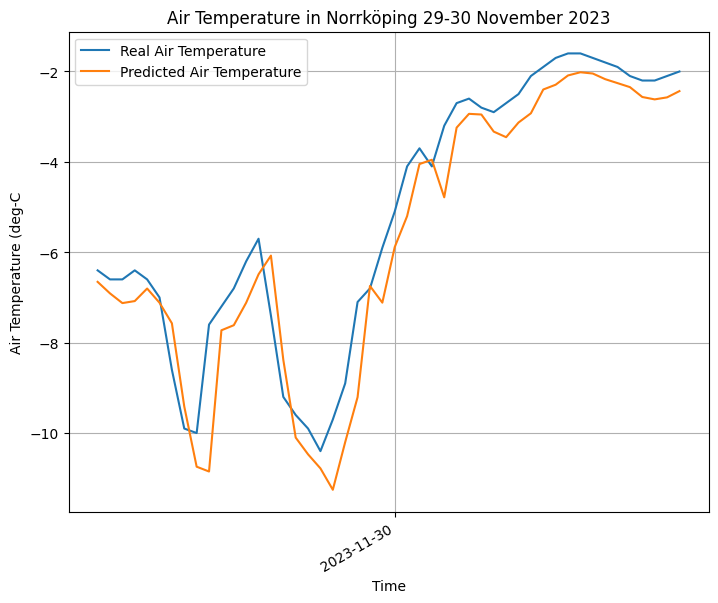

In [54]:
# PART THREE
# Visualize results

# First of all we need to import the libraries we need to make the plot
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

# We create a figure to draw our plot in. Then we add som axes:    
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

# Now we can add our the date and time that we prepared earlier in the
# variable "date_time".
# We also add the real temperature and the predicted temperature to see
# how well our RNN guessed.
ax.plot(date_time, real_temperature)
ax.plot(date_time, predicted_temperature)

# We need to define in what format we want the x axis to be displayed: 'YYYY-mm-dd' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))

# This you can choose - I like to see the grids.
ax.grid(True)

# Rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them. This is just to make the graph
# to look nicer! :)
fig.autofmt_xdate()

# We put a title to the graph and some x,y-labels.
# Also put in legends to be able to see which one is the real values 
# and which are predicted.
plt.title('Air Temperature in Norrköping 29-30 November 2023')
plt.xlabel('Time')
plt.ylabel('Air Temperature (deg-C')
plt.legend(['Real Air Temperature', 'Predicted Air Temperature'])

In [55]:
# Well done! This is all for this time. Use this code as a template for your own problems and experiment
# with the results. Have fun! :)